In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import scipy.stats as ss

advertising_df = pd.read_csv("Advertising.csv", index_col=0)
advertising_df['intercept'] = 1
y_var = 'sales'
advertising_df.head()

,TV,radio,newspaper,sales,intercept
1,230.1,37.8,69.2,22.1,1
2,44.5,39.3,45.1,10.4,1
3,17.2,45.9,69.3,9.3,1
4,151.5,41.3,58.5,18.5,1
5,180.8,10.8,58.4,12.9,1


## Estimating the Coefficients

In [2]:
# x_vars = ['intercept', 'TV']
# model = sm.OLS(advertising_df[y_var], advertising_df[x_vars])

model = ols(f"{y_var} ~ TV", data=advertising_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        11:49:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We've optimized the parameters $\beta_0$ and $\beta_1$, what is the objective?
Let $e_i = y_i - \hat{y}_i$ represent the residual of a prediction $\hat{y}_i$. Then the sum of squared residuals is
$
\begin{equation}
RSS = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}
$

We can think of this as the amount of variablility that is left in the response after performing the regression.

In [3]:
RSS = ((results.predict(advertising_df[['intercept', 'TV']]) - advertising_df['sales'])**2).sum()
RSS

2102.5305831313512

In [4]:
sm.stats.anova_lm(results)

,df,sum_sq,mean_sq,F,PR(>F)
TV,1.0,3314.618167,3314.618167,312.144994,1.467390e-42
Residual,198.0,2102.530583,10.618841,NaN,NaN


### Where does the standard error come from? Do we know the true standard deviation of the errors in the model?
$
\begin{equation}
\hat{\sigma} = RSE = \sqrt{ RSS / (n - p - 1)}
\end{equation}
$

In [5]:
# degrees of freedom = n - p - 1, where p is the number of predictor variables
degrees_of_freedom = (len(advertising_df) - 1 - 1)

RSE = np.sqrt(RSS / degrees_of_freedom)
RSE

3.2586563686504624

In [6]:
SE_beta_1 = np.sqrt((RSE**2) / ((advertising_df['TV'] - advertising_df['TV'].mean())**2).sum())
SE_beta_1.round(3)

0.003

## What is this $t$?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


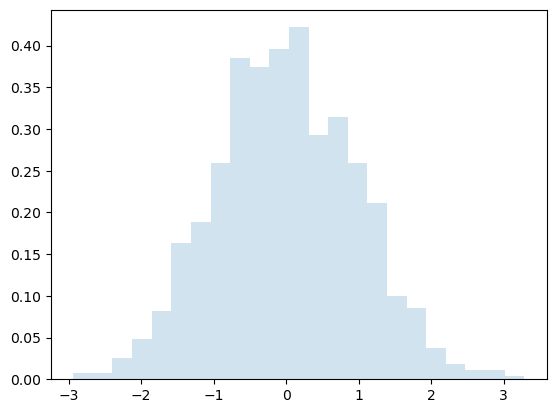

In [7]:
t_var = ss.t(degrees_of_freedom)
sample = t_var.rvs(size=1000)

fig, ax = plt.subplots()
ax.hist(sample, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## Let's calculate a t-statistic, p-value, and confidence interval
* Note: the t-statistic for a parameter is measured with the hypothesis that the parameter equals 0, i.e. it has no relationship with the outcome

In [8]:
results.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [9]:
beta_1 = results.params['TV']
t_stat_beta_1 = (beta_1 - 0) / SE_beta_1

p_val_t_stat_beta_1 = 1 - t_var.cdf(t_stat_beta_1)

lb_beta_1 = beta_1 + t_var.ppf(.025) * SE_beta_1
ub_beta_1 = beta_1 + t_var.ppf(.975) * SE_beta_1

print("t-statistic:", round(t_stat_beta_1, 3))
print("p-val of t-statistic:", p_val_t_stat_beta_1)
print("95% Confidence Interval:", round(lb_beta_1, 3), "to", round(ub_beta_1, 3))


t-statistic: 17.668
p-val of t-statistic: 0.0
95% Confidence Interval: 0.042 to 0.053


## What proportion of the variance in sales is explained by this model?
Let the sum of squared difference between the outcomes ($y_i$) and the mean of all outcomes ($\bar{y}$) be TSS, i.e.
$
\begin{align}
TSS &= \sum_{i = 1}^n (y_i - \bar{y})^2 \\
R^2 &= \frac{TSS - RSS}{TSS}
\end{align}
$

In [10]:
TSS = ((advertising_df['sales'] - advertising_df['sales'].mean())**2).sum()
R_squared = (TSS - RSS) / TSS
R_squared

0.6118750508500711

## Multiple regression

In [37]:
model_multiple = ols(f"{y_var} ~ TV + radio + newspaper", data=advertising_df)
results_multiple = model_multiple.fit()
results_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        12:10:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see all of the previous statistics, now let's perform a hypothesis test on whether the model variables have a relationship with the response
* Another way of stating this is that our hypothesis is that all of the estimated model parameters on the predictor variables are zero, i.e. $\beta_1 = \beta_2 = \beta_3 = 0$
* We might want to think that we can just look at the p-values of the variables, but this is not valid. If we had 100 variables, we expect about 5 of those to have a p-value of less than .05!

The $F$ statistic can help us with this:
$
\begin{equation}
F = \frac{\left(TSS - RSS \right) / p}{RSS / (n - p - 1)}
\end{equation}
$

* If our model assumptions are correct we expect that the numerator and denominator both equal the variance of the error distribution, i.e. $F = \frac{\sigma^2}{\sigma^2} = \frac{Var(\epsilon)}{Var(\epsilon)}$ where the model is $Y \sim f(X) + \epsilon$, and there is little relationship between the predictor and variables outcomes.

In [38]:
TSS_multiple = results_multiple.centered_tss
RSS_multiple = results_multiple.ssr

p = 3
n = len(advertising_df)

F_stat_multiple = ((TSS_multiple - RSS_multiple) / p) / (RSS_multiple / (n - p - 1))

print("TSS:", TSS_multiple)
print("RSS:", RSS_multiple)
print("F-stat:", F_stat_multiple)

TSS: 5417.14875
RSS: 556.8252629021874
F-stat: 570.270703659094
